In [10]:
from itertools import combinations

def zbiory_bazowe_dopuszczalne(A, b):
    """Dany problem w postaci równościowej: Ax = b, x >= 0."""
    
    n = A.ncols()  # wymiar przestrzeni
    m = A.nrows()  # liczba równań

    bazowe_dopuszczalne = []
    
    for Base in combinations(range(n), m):
        AB = A.matrix_from_columns(Base)
        if AB.det() != 0:
            if  all(i >= 0 for i in ~AB * b):
                bazowe_dopuszczalne.append(Base)

    return bazowe_dopuszczalne

def rozwiazanie_bazowe(A, b, Base):
    """Dany problem w postaci równościowej: Ax = b, x >= 0."""

    AB = A.matrix_from_columns(Base)
    if AB.det() == 0:
        return None
    
    n = A.ncols()  # wymiar przestrzeni

    wartosci_bazowe = ~AB * b
    rozwiazanie = [0] * n
    for i, bi in enumerate(Base):
        rozwiazanie[bi] = wartosci_bazowe[i]
    return rozwiazanie

def wierzcholki(A, b):
    """Dla danego problemu w postaci standardowej: Ax <= b, x >= 0 funkcja zwraca 
    listę rozwiązań bazowych dopuszczalnych."""
    
    n = A.ncols()  # wymiar przestrzeni
    m = A.nrows()  # liczba nierówności
    A = A.augment(identity_matrix(m))  # macierz w postaci równościowej
    
    # Poniżej używamy zbioru a nie listy by usunąć duplikaty
    # Wymaga to konwersji list na krotki ("tuple"), bo elementy zbioru muszą być "immutable"
    
    return {tuple(rozwiazanie_bazowe(A, b, Base)[0: n]) for Base in zbiory_bazowe_dopuszczalne(A, b)}

# Wyznaczanie wierzchołków dla zbioru rozwiązań dopuszczalnych w postaci standardowej

In [54]:
A = matrix(QQ, [[-4, 1], [-1, 2], [1, 1], [1, -1], [1, -6]])
b = vector(QQ, [1, 9, 12, 4, -6])

W = wierzcholki(A, b)
W

{(0, 1), (1, 5), (5, 7), (6, 2), (8, 4)}

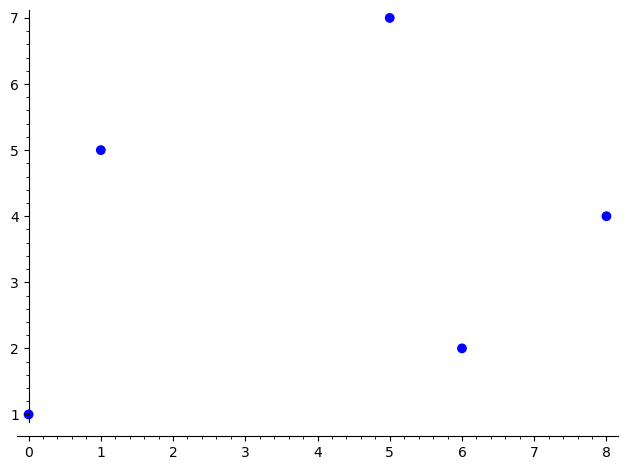

In [64]:
# Ilustracja - wyliczony zbiór punktów

plot(list_plot(list(W), size=50))

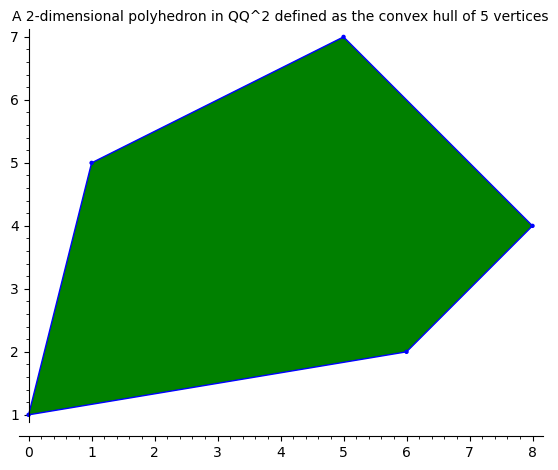

In [63]:
# Lepsza ilustracja - otoczka wypukła

Polyhedron(W)

# Ciekawszy przykład w 3D

In [73]:
def losowy_wieloscian(n = 3, m = 12):
    """Macierze A, b generujące (Ax<=b, x>=0) losowy wielościan w przestrzeni n-wymiarowej. 
    Generowane jest m nietrywialnych ścian wielościanu, stycznych do sfery jednostkowej."""

    A = []
    for _ in range(m):
        T = SphericalDistribution()
        punkt_stycznosci = list(abs(x) for x in T.get_random_element())
        A.append(punkt_stycznosci)
    b = [1] * m
    
    return matrix(A), vector(b)

A1, b1 = losowy_wieloscian()
A1, b1

(
[  0.9281719290199818  0.35167003268358177  0.12175819599375783]
[  0.4786731372917075 0.010085468996720495   0.8779352544182459]
[  0.6650040723006952  0.38002243975408717   0.6429249793769434]
[  0.3241668661976731   0.8730803043471252  0.36420684373129386]
[  0.5682858738461595  0.27540127452195945   0.7753742990186012]
[  0.4835847707542524   0.3351443844569321   0.8085938480235558]
[  0.9788460366869502  0.08626299536694049   0.1855239394056002]
[  0.3132102867170295   0.9370754172742001  0.15423676161998473]
[0.016478397772211342    0.375196868650565   0.9267986686231652]
[  0.1794438133487692   0.7633562415135803   0.6205539190055227]
[   0.849398362280641  0.42918714684269477   0.3071169404966001]
[  0.4702453556650866   0.2659530144665839    0.841509536233282],

(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
)

In [74]:
W1 = wierzcholki(A1, b1)
W1

{(0, 0, 0),
 (0, 0, 1.0789829915116098),
 (0, 0.6452043794351652, 0.8177842317385382),
 (0, 0.971844205959985, 0.415977809011852),
 (0, 1.016173401324528, 0.3097114165854311),
 (0, 1.067149966337648, 0),
 (0.11385650088502564, 0, 1.0769586330678038),
 (0.22703365112949325, 0.1517627036378455, 1.0135081003100497),
 (0.26253065563196953, 0.5588741215859093, 0.8480656281130348),
 (0.2654110464943369, 0.38561558485769254, 0.9181548485880029),
 (0.47207953376115996, 0.6382316704489865, 0.6898516083423627),
 (0.5181251342072519, 0.2848619574314011, 0.8087777219333647),
 (0.5259503736312365, 0.701049894085221, 0.5969999313753689),
 (0.5513001378885809, 0.1372977459841902, 0.8368757463031082),
 (0.5686256267798975, 0.3997249322569467, 0.7309673969200026),
 (0.6511107771958105, 0.7110481035731604, 0.4616315372147288),
 (0.6983230742377003, 0.7996251833257744, 0.20727177511480727),
 (0.7677542916794473, 0.8105339700236763, 0),
 (0.7778819655654825, 0.7904904303329037, 0),
 (0.8027164328408747, 0

In [75]:
# Ilustracja - wyliczony zbiór punktów

plot(list_plot(list(W1)))

Graphics3d Object

In [76]:
list_plot(list(A1), color='yellow') + plot(Polyhedron(W1))

Graphics3d Object

In [77]:
P = InteractiveLPProblemStandardForm(A, b, [0, 0, 0])
show(P)

LP problem (use 'view(...)' or '%display typeset' for details)